In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
import numpy as np

TensorFlow version: 2.17.0


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
fminst = tf.keras.datasets.fashion_mnist
((training_images, training_labels), (test_images, test_labels)) = fminst.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
training_images = training_images/255.0
test_images = test_images/255.0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
print(f'\nMODEL TRAINING : ')
model.fit(training_images, training_labels, epochs=5)

print(f'\nMODEL EVALUATION : ')
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)

print(f'\ntest set accuracy : {test_accuracy}')
print(f'\ntest set loss : {test_loss}')


MODEL TRAINING : 
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7794 - loss: 0.6405
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8612 - loss: 0.3894
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8776 - loss: 0.3380
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8845 - loss: 0.3140
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8920 - loss: 0.2916

MODEL EVALUATION : 

test set accuracy : 0.876800000667572

test set loss : 0.3462878465652466


In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

conv_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
conv_model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
print(f'\nMODEL TRAINING : ')
conv_model.fit(training_images, training_labels, epochs=5)

print(f'\nMODEL EVALUATION : ')
test_loss, test_accuracy = conv_model.evaluate(test_images, test_labels, verbose=0)

print(f'\ntest set accuracy : {test_accuracy}')
print(f'\ntest set loss : {test_loss}')


MODEL TRAINING : 
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 47ms/step - accuracy: 0.7803 - loss: 0.6012
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 46ms/step - accuracy: 0.8903 - loss: 0.2975
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 146s 48ms/step - accuracy: 0.9057 - loss: 0.2533
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 47ms/step - accuracy: 0.9201 - loss: 0.2136
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 47ms/step - accuracy: 0.9284 - loss: 0.1882

MODEL EVALUATION : 

test set accuracy : 0.9056000113487244

test set loss : 0.26142144203186035


In [ ]:
# Define the model
model1 = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model1.summary()

# Use same settings
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("\nMODEL TRAINING:")
model1.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print("\nMODEL EVALUATION:")
test_loss, test_accuracy = model1.evaluate(test_images, test_labels, verbose=0)
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)


MODEL TRAINING:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 48ms/step - accuracy: 0.7781 - loss: 0.6132
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.8896 - loss: 0.3041
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.9072 - loss: 0.2512
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 46ms/step - accuracy: 0.9193 - loss: 0.2174
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 47ms/step - accuracy: 0.9298 - loss: 0.1870

MODEL EVALUATION:
test set accuracy: 0.9085000157356262
test set loss: 0.2503691017627716


In [ ]:
# Train the model
print("\nMODEL TRAINING:")
model1.fit(training_images, training_labels, epochs=10)

# Evaluate on the test set
print("\nMODEL EVALUATION:")
test_loss, test_accuracy = model1.evaluate(test_images, test_labels, verbose=0)
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')


MODEL TRAINING:
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.9359 - loss: 0.1706
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 47ms/step - accuracy: 0.9451 - loss: 0.1476
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9502 - loss: 0.1318
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 46ms/step - accuracy: 0.9589 - loss: 0.1093
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 46ms/step - accuracy: 0.9626 - loss: 0.0982
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 45ms/step - accuracy: 0.9688 - loss: 0.0843
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 45ms/step - accuracy: 0.9706 - loss: 0.0759
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9752 - loss: 0.0664
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 46ms/step - accuracy: 0.9787 - loss: 0.0571
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 147s 49ms/step - accuracy: 0.9792 - loss: 0.0553

MODEL EVALUATION:
test set accuracy: 0.907800018787384
test set loss: 0.401

In [ ]:
print(f"First 100 labels:\n\n{test_labels[:100]}")

print(f"\nShoes: {[i for i in range(100) if test_labels[:100][i]==9]}")

First 100 labels:

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]

Shoes: [0, 23, 28, 39, 68, 83]


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
layers_to_visualize = [tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D]

layer_outputs = [layer.output for layer in model1.layers if type(layer) in layers_to_visualize]

In [ ]:
activation_model = tf.keras.models.Model(inputs = model1.inputs, outputs = layer_outputs)

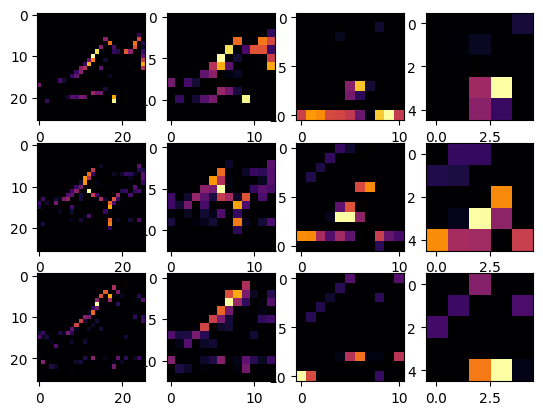

In [ ]:
f, axarr = plt.subplots(3,len(layer_outputs))

for x in range(len(layer_outputs)):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[1,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[2,x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

In [ ]:
# Define the model
model2 = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model2.summary()

# Use same settings
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("\nMODEL TRAINING:")
model2.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print("\nMODEL EVALUATION:")
test_loss, test_accuracy = model2.evaluate(test_images, test_labels, verbose=0)
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)


MODEL TRAINING:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 47ms/step - accuracy: 0.7813 - loss: 0.6008
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 48ms/step - accuracy: 0.8914 - loss: 0.3022
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.9072 - loss: 0.2498
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 46ms/step - accuracy: 0.9217 - loss: 0.2121
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 46ms/step - accuracy: 0.9293 - loss: 0.1880

MODEL EVALUATION:
test set accuracy: 0.9061999917030334
test set loss: 0.25677961111068726


In [ ]:
# Define the model
model3 = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model3.summary()

# Use same settings
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("\nMODEL TRAINING:")
model3.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print("\nMODEL EVALUATION:")
test_loss, test_accuracy = model3.evaluate(test_images, test_labels, verbose=0)
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,386 (442.91 KB)

 Trainable params: 113,386 (442.91 KB)

 Non-trainable params: 0 (0.00 B)


MODEL TRAINING:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.7584 - loss: 0.6675
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 25ms/step - accuracy: 0.8777 - loss: 0.3324
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 24ms/step - accuracy: 0.8981 - loss: 0.2760
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9078 - loss: 0.2460
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9189 - loss: 0.2214

MODEL EVALUATION:
test set accuracy: 0.9083999991416931
test set loss: 0.2539348900318146


In [ ]:
# Define the model
model4 = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model4.summary()

# Use same settings
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("\nMODEL TRAINING:")
model4.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print("\nMODEL EVALUATION:")
test_loss, test_accuracy = model4.evaluate(test_images, test_labels, verbose=0)
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 11, 11, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          51,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,098 (215.23 KB)

 Trainable params: 55,098 (215.23 KB)

 Non-trainable params: 0 (0.00 B)


MODEL TRAINING:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.7528 - loss: 0.6892
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8694 - loss: 0.3573
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8854 - loss: 0.3082
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8970 - loss: 0.2773
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9087 - loss: 0.2490

MODEL EVALUATION:
test set accuracy: 0.8934000134468079
test set loss: 0.2973000705242157


In [ ]:
# Define the model
model5 = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model5.summary()

# Use same settings
model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("\nMODEL TRAINING:")
model5.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print("\nMODEL EVALUATION:")
test_loss, test_accuracy = model5.evaluate(test_images, test_labels, verbose=0)
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)


MODEL TRAINING:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.8270 - loss: 0.4921
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.9076 - loss: 0.2570
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.9228 - loss: 0.2103
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.9396 - loss: 0.1647
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9488 - loss: 0.1395

MODEL EVALUATION:
test set accuracy: 0.9075000286102295
test set loss: 0.27601656317710876


In [ ]:
# Define the model
model6 = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model6.summary()

# Use same settings
model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("\nMODEL TRAINING:")
model6.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print("\nMODEL EVALUATION:")
test_loss, test_accuracy = model6.evaluate(test_images, test_labels, verbose=0)
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,106 (328.54 KB)

 Trainable params: 84,106 (328.54 KB)

 Non-trainable params: 0 (0.00 B)


MODEL TRAINING:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 47ms/step - accuracy: 0.7045 - loss: 0.7953
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 47ms/step - accuracy: 0.8501 - loss: 0.4075
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.8740 - loss: 0.3428
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 45ms/step - accuracy: 0.8885 - loss: 0.3019
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 46ms/step - accuracy: 0.9017 - loss: 0.2674

MODEL EVALUATION:
test set accuracy: 0.8798999786376953
test set loss: 0.32031041383743286


In [ ]:
# Define the model
model7 = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model7.summary()

# Use same settings
model7.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("\nMODEL TRAINING:")
model7.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print("\nMODEL EVALUATION:")
test_loss, test_accuracy = model7.evaluate(test_images, test_labels, verbose=0)
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)


MODEL TRAINING:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 36ms/step - accuracy: 0.8186 - loss: 0.5020
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9090 - loss: 0.2523
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.9252 - loss: 0.2013
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.9380 - loss: 0.1673
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9497 - loss: 0.1353

MODEL EVALUATION:
test set accuracy: 0.9162999987602234
test set loss: 0.25307419896125793


In [ ]:
class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss = logs.get('loss')
        if loss <= 0.25:
            self.model.stop_training = True

In [ ]:
# Define the model
model8 = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model8.summary()

# Use same settings
model8.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("\nMODEL TRAINING:")
model8.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print("\nMODEL EVALUATION:")
test_loss, test_accuracy = model8.evaluate(test_images, test_labels, verbose=0, callback=[CustomCallback])
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)


MODEL TRAINING:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 38ms/step - accuracy: 0.8182 - loss: 0.5059
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.9061 - loss: 0.2542
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9227 - loss: 0.2086
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9382 - loss: 0.1676
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9495 - loss: 0.1376

MODEL EVALUATION:


ValueError: Arguments not recognized: {'callback': [<class '__main__.CustomCallback'>]}